## Running Model on Testing Set

#### Import Libraries

In [16]:
import os
import cv2
import math
import warnings
import scipy.misc
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
from sklearn.metrics import mean_squared_error

tf.disable_v2_behavior()
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [17]:
os.chdir("C:/Users/2ativ/Documents/Independent Study/Projects/Self Driving/Self-Driving-Car-Simulation")

### Loading the model

In [18]:
sess = tf.InteractiveSession()
saver = tf.train.import_meta_graph('./models/atan/model_atan.ckpt.meta')
saver.restore(sess, "./models/atan/model_atan.ckpt")

graph = tf.get_default_graph()
predicted_angle = graph.get_tensor_by_name("predicted_angle:0")
true_image = graph.get_tensor_by_name("true_image:0")
keep_prob = graph.get_tensor_by_name("keep_prob:0")

INFO:tensorflow:Restoring parameters from ./models/atan/model_atan.ckpt


### Steering Wheel Image
Using steering wheel to depict the accurate angle it rotated on the test images/road

In [19]:
img = cv2.imread('./Dataset/steering_wheel_image.jpg',0)
rows,cols = img.shape

smoothed_angle = 0

### Prepping the Test Dataset

In [20]:
#read data.txt
xs = []
ys = []
with open("./Dataset/driving_dataset/driving_dataset/data.txt") as f:
    for line in f:
        xs.append("data/" + line.split()[0]) 
        ys.append(float(line.split()[1]) * scipy.pi / 180)

#get number of images
num_images = len(xs)


In [21]:
import sys
# Downgrading SCIPY to fit with our opencv library
!{sys.executable} -m pip install scipy==1.2.2

### Running the test images
Testing model accuracy on angles rotated by the test images and angle at which it predicted it to rotate

Using OpenCV libraries, rotate the steering wheel to that particular angle to give sense of driving

In [22]:
i = math.ceil(num_images*0.7)
print("Starting frame of video:" +str(i))
prediction = []
actuals = []
while(cv2.waitKey(10) != ord('q')):
    full_image = scipy.misc.imread("./Dataset/driving_dataset/driving_dataset/" + str(i) + ".jpg", mode="RGB")
    image = scipy.misc.imresize(full_image[-150:], [66, 200]) / 255.0
    degrees = predicted_angle.eval(feed_dict={true_image: [image], keep_prob: 1.0})[0][0] * 180.0 / scipy.pi
    print("Steering angle: " + str(degrees) + " (pred)\t" + str(ys[i]*180/scipy.pi) + " (actual)")
    prediction.append(degrees)
    actuals.append(ys[i]*180/scipy.pi)
    cv2.imshow("frame", cv2.cvtColor(full_image, cv2.COLOR_RGB2BGR))
    smoothed_angle += 0.2 * pow(abs((degrees - smoothed_angle)), 2.0 / 3.0) * (degrees - smoothed_angle) / abs(degrees - smoothed_angle)
    M = cv2.getRotationMatrix2D((cols/2,rows/2),-smoothed_angle,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    cv2.imshow("steering wheel", dst)
    i += 1

cv2.destroyAllWindows()
sess.close()


Starting frame of video:31785
Steering angle: -19.758405381958735 (pred)	-28.34 (actual)
Steering angle: -20.425404090261747 (pred)	-28.840000000000003 (actual)
Steering angle: -18.153669511937164 (pred)	-29.75 (actual)
Steering angle: -19.01653584752134 (pred)	-31.06 (actual)
Steering angle: -24.94601601885346 (pred)	-32.27 (actual)
Steering angle: -20.67331434392382 (pred)	-33.48 (actual)
Steering angle: -26.237966790928883 (pred)	-34.39 (actual)
Steering angle: -25.5171632674391 (pred)	-35.599999999999994 (actual)
Steering angle: -24.541697848292678 (pred)	-36.5 (actual)
Steering angle: -20.829320987208792 (pred)	-37.61 (actual)
Steering angle: -20.25546898371183 (pred)	-38.62 (actual)
Steering angle: -17.03910899789073 (pred)	-39.63 (actual)
Steering angle: -17.09851627574421 (pred)	-39.93000000000001 (actual)
Steering angle: -19.29084136723093 (pred)	-40.03000000000001 (actual)
Steering angle: -29.11728426196653 (pred)	-40.03000000000001 (actual)
Steering angle: -30.67936218552678

Steering angle: 4.935404621131534 (pred)	-1.11 (actual)
Steering angle: 2.8649785560922663 (pred)	-0.61 (actual)
Steering angle: 4.798480672613935 (pred)	-0.61 (actual)
Steering angle: 6.6545162776732 (pred)	-0.61 (actual)
Steering angle: 6.043456391785771 (pred)	-0.61 (actual)
Steering angle: 5.8458214530568675 (pred)	-0.61 (actual)
Steering angle: 6.133441999666573 (pred)	-0.61 (actual)
Steering angle: 6.726366452647149 (pred)	-0.61 (actual)
Steering angle: 6.882405539330676 (pred)	-0.5 (actual)
Steering angle: 7.701430171293007 (pred)	-0.3 (actual)
Steering angle: 7.950888316575735 (pred)	0.2 (actual)
Steering angle: 8.000419994663021 (pred)	0.3 (actual)
Steering angle: 9.959255069372857 (pred)	0.4 (actual)
Steering angle: 8.627141931204113 (pred)	0.5 (actual)
Steering angle: 11.205700559876714 (pred)	1.01 (actual)
Steering angle: 5.224126535744905 (pred)	1.6100000000000003 (actual)
Steering angle: 4.703730154013402 (pred)	2.12 (actual)
Steering angle: 1.9700355177315976 (pred)	2.52

Steering angle: 16.641325610818356 (pred)	23.09 (actual)
Steering angle: 17.637192805015605 (pred)	23.09 (actual)
Steering angle: 17.896376285902786 (pred)	23.09 (actual)
Steering angle: 18.589719033834534 (pred)	23.29 (actual)
Steering angle: 19.252250798420356 (pred)	23.39 (actual)
Steering angle: 19.936029573966795 (pred)	23.29 (actual)
Steering angle: 21.783655508610483 (pred)	22.89 (actual)
Steering angle: 21.983093617280268 (pred)	22.59 (actual)
Steering angle: 19.432648047231442 (pred)	22.59 (actual)
Steering angle: 19.075688700828234 (pred)	22.39 (actual)
Steering angle: 17.670023816808563 (pred)	22.08 (actual)
Steering angle: 20.625202491410253 (pred)	22.08 (actual)
Steering angle: 19.478026116529712 (pred)	22.08 (actual)
Steering angle: 18.13008486873311 (pred)	21.98 (actual)
Steering angle: 14.718338783967335 (pred)	21.78 (actual)
Steering angle: 14.543824035578924 (pred)	21.68 (actual)
Steering angle: 16.991497456733864 (pred)	21.68 (actual)
Steering angle: 21.7796752158716

Steering angle: 35.679897356149446 (pred)	38.72 (actual)
Steering angle: 37.18006986016729 (pred)	39.13 (actual)
Steering angle: 27.81595393261339 (pred)	39.43 (actual)
Steering angle: 27.688191829093718 (pred)	39.830000000000005 (actual)
Steering angle: 25.125322144944636 (pred)	39.93000000000001 (actual)
Steering angle: 19.474583701188028 (pred)	39.93000000000001 (actual)
Steering angle: 16.98129656920845 (pred)	40.13 (actual)
Steering angle: 12.735069561275425 (pred)	40.64000000000001 (actual)
Steering angle: 13.658683599337692 (pred)	41.24 (actual)
Steering angle: 17.27466173179696 (pred)	41.75 (actual)
Steering angle: 20.40988760801477 (pred)	42.959999999999994 (actual)
Steering angle: 26.421663021109083 (pred)	43.97 (actual)
Steering angle: 32.3245874169482 (pred)	44.57 (actual)
Steering angle: 33.67549296684458 (pred)	45.18 (actual)
Steering angle: 37.87526358936412 (pred)	45.88 (actual)
Steering angle: 39.59792267540596 (pred)	46.39 (actual)
Steering angle: 39.84195508916676 (p

Steering angle: 5.631870899948095 (pred)	5.45 (actual)
Steering angle: 5.950398479438932 (pred)	4.64 (actual)
Steering angle: 5.841161129608802 (pred)	3.829999999999999 (actual)
Steering angle: 6.283880331230689 (pred)	3.53 (actual)
Steering angle: 6.156217692340804 (pred)	3.4300000000000006 (actual)
Steering angle: 6.029177454439036 (pred)	3.4300000000000006 (actual)
Steering angle: 5.975358125100274 (pred)	0.0 (actual)
Steering angle: 5.949680028915612 (pred)	3.13 (actual)
Steering angle: 5.8289487513728195 (pred)	2.92 (actual)
Steering angle: 6.198876065688942 (pred)	2.62 (actual)
Steering angle: 6.401815500082007 (pred)	1.92 (actual)
Steering angle: 6.535340148827055 (pred)	1.21 (actual)
Steering angle: 6.473798863744771 (pred)	1.01 (actual)
Steering angle: 6.6912234218201405 (pred)	1.01 (actual)
Steering angle: 7.0792904379113475 (pred)	1.01 (actual)
Steering angle: 7.662110479788535 (pred)	1.01 (actual)
Steering angle: 9.061547085058802 (pred)	1.21 (actual)
Steering angle: 8.1057

Steering angle: -25.723279593569863 (pred)	-29.04 (actual)
Steering angle: -24.064482776267642 (pred)	-28.840000000000003 (actual)
Steering angle: -21.2483923663768 (pred)	-28.34 (actual)
Steering angle: -20.52898561657228 (pred)	-27.830000000000002 (actual)
Steering angle: -22.941811412581817 (pred)	-27.830000000000002 (actual)
Steering angle: -27.08540031408341 (pred)	-28.13 (actual)
Steering angle: -28.89196656653157 (pred)	-28.24 (actual)
Steering angle: -32.94602534839264 (pred)	-28.24 (actual)
Steering angle: -35.91527933532643 (pred)	-28.24 (actual)
Steering angle: -37.08320411735817 (pred)	-28.34 (actual)
Steering angle: -37.732201862103615 (pred)	-28.34 (actual)
Steering angle: -35.49678681469058 (pred)	-28.03 (actual)
Steering angle: -34.50495455474552 (pred)	-27.93 (actual)
Steering angle: -38.788073975706716 (pred)	-27.93 (actual)
Steering angle: -39.18721657042392 (pred)	-27.830000000000002 (actual)
Steering angle: -43.32343911290566 (pred)	-27.43 (actual)
Steering angle: 

Steering angle: -29.412799226596306 (pred)	-31.969999999999995 (actual)
Steering angle: -31.84630342031805 (pred)	-31.359999999999996 (actual)
Steering angle: -26.5889787501123 (pred)	-31.06 (actual)
Steering angle: -25.643938408623704 (pred)	-30.449999999999992 (actual)
Steering angle: -20.25071346450221 (pred)	-29.34 (actual)
Steering angle: -19.584285076994895 (pred)	-28.03 (actual)
Steering angle: -15.511591831530739 (pred)	-27.130000000000003 (actual)
Steering angle: -20.833198827110063 (pred)	-26.02 (actual)
Steering angle: -16.985903531803622 (pred)	-25.71 (actual)
Steering angle: -14.956005461421682 (pred)	-24.200000000000003 (actual)
Steering angle: -22.362493550201552 (pred)	-22.49 (actual)
Steering angle: -16.027108896873912 (pred)	-21.18 (actual)
Steering angle: -5.131183029066664 (pred)	-20.57 (actual)
Steering angle: -3.2247931350119496 (pred)	-20.370000000000005 (actual)
Steering angle: -0.4913095942641803 (pred)	-20.07 (actual)
Steering angle: -4.441459000734552 (pred)	

In [23]:
print("Converting Back to Radians")
actuals = [i*scipy.pi/180 for i in actuals]
prediction = [i*scipy.pi/180 for i in prediction]

Converting Back to Radians


In [24]:
print(f"MSE: {mean_squared_error(actuals, prediction)}")

MSE: 0.05027221519401875


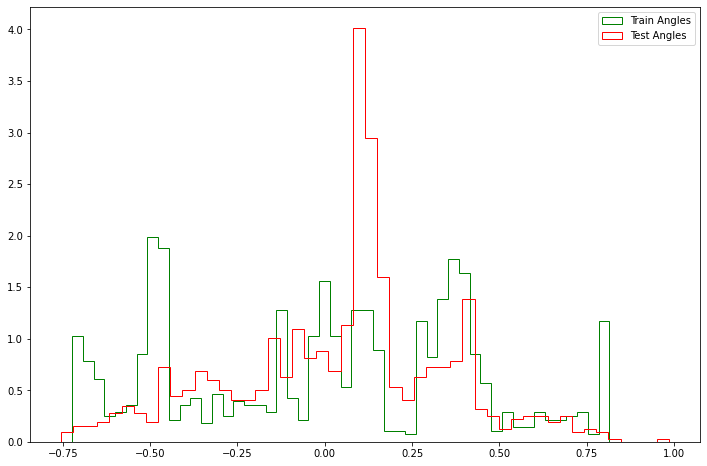

In [25]:
plt.figure(figsize=(12,8))
plt.hist(actuals, bins=50, density=1, color='green', histtype ='step',label="Train Angles")
plt.hist(prediction, bins=50, density=1, color='red', histtype ='step',label="Test Angles")
plt.legend()
plt.show()

## Result
- This gives an MSE of ~0.05, which is better than the mean model we used at the start (Which gave MSE of 0.2). Thus our model was able to do a better job

- The model is able to identify every turns it is faced with, as seen from the graph above, but turns a bit more than required

- This can be solved by using a linear activation function (since we saw that by using base model of means, we saw a good relation)

## Conclusion:

- Thus, by using a variant of online Q-learning that combines stochastic minibatch updates with experience replay memory to ease the training of deep networks for RL.
- A small amount of training data from less than a hundred hours of driving was sufficient to train the car to operate in diverse conditions, on highways, local and residential roads in sunny, cloudy, and rainy conditions. The CNN is able to learn meaningful road features from a very sparse training signal (steering alone).
- The system learns for example to detect the outline of a road without the need of explicit labels during training.
- More work is needed to improve the robustness of the network, to find methods to verify the robustness, and to improve visualization of the network-internal processing steps.
